In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iran-covid-1mos/train.csv
/kaggle/input/iran-covid-1mos/test.csv


Read train and test data

In [87]:
data = pd.read_csv("/kaggle/input/iran-covid-1mos/train.csv", header=None, names=["index", "day", "cases"], dtype="Int64", skip_blank_lines=True, usecols=["day", "cases"])

In [88]:
data = data.dropna().reset_index(drop=True); data

,day,cases
0,20,3822
1,21,4206
2,22,4108
3,23,4830
4,24,4616
5,25,4552
6,26,4103
7,27,3890
8,28,4251
9,29,5039


In [89]:
data.describe()

,day,cases
count,31.000000,31.000000
mean,15.645161,6678.548387
std,8.693095,2075.576110
min,1.000000,3822.000000
25%,8.500000,4723.000000
50%,16.000000,6191.000000
75%,22.500000,8372.500000
max,30.000000,10463.000000


In [90]:
t = data[["cases"]]; t

,cases
0,3822
1,4206
2,4108
3,4830
4,4616
5,4552
6,4103
7,3890
8,4251
9,5039


In [91]:
X = np.arange(len(data)) + 1
X = X.reshape(-1, 1); X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31]])

In [97]:
reg = linear_model.LinearRegression()
reg.fit(X, t)

print("intercept:", reg.intercept_)
print("coef:", reg.coef_)

intercept: [3125.89032258]
coef: [[222.04112903]]


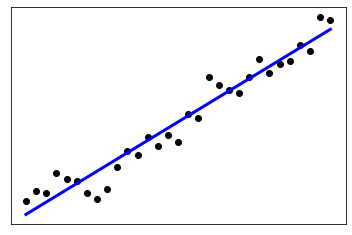

In [93]:
plt.scatter(X, t,  color='black')
plt.plot(X, t_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [94]:
def mean(numbers):
    """ Calculate mean of given numbers """
    return sum(numbers) / len(numbers)
 
def cov(X, t):
    """ Calculate cov between X and t """
    mean_X = mean(X)
    mean_t = mean(t)
    
    return sum([(X[n] - mean_X) * (t[n] - mean_t) for n in range(len(X))])

def var(numbers):
    """ Calculate variance of numbers """
    mu = mean(numbers)
    return sum([(n - mu) ** 2 for n in numbers])
 
# Calculate coefficients
def coefficients(dataset):
    X = dataset[:,0]
    t = dataset[:,1]
    mean_x, mean_y = mean(X), mean(t)
    coef = cov(X, t) / var(X)
    intercept = mean_y - coef * mean_x
    return [intercept, coef]
 
# calculate coefficients
dataset = np.dstack((X, t)).reshape(-1, 2)
intercept, coef = coefficients(dataset)
print("intercept:", intercept)
print("coef:", coef)

intercept: 3125.8903225806457
coef: 222.04112903225806


In [107]:
test = pd.read_csv("/kaggle/input/iran-covid-1mos/test.csv", header=None, names=["index", "day", "cases"], dtype="Int64", skip_blank_lines=True, usecols=["day", "cases"])
test = test.dropna().reset_index(drop=True)
ttest = test[["cases"]].to_numpy()
Xtest = np.arange(len(test)) + len(data) + 1
Xtest = Xtest.reshape(-1, 1)

t_pred = reg.predict(Xtest)

print('Mean squared error: %.2f'
      % mean_squared_error(ttest, t_pred))

print('Coefficient of determination: %.2f'
      % r2_score(ttest, t_pred))

Mean squared error: 1814456.25
Coefficient of determination: -1.69


In [ ]:
plt.scatter(Xtest, t,  color='black')
plt.plot(Xtest, t_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()